In [1]:
import os
import json
# import tensorflow as tf
# assert tf.__version__.startswith('2')

# from mediapipe_model_maker import object_detector

In [2]:
!wget https://storage.googleapis.com/mediapipe-tasks/object_detector/android_figurine.zip
!unzip android_figurine.zip
train_dataset_path = "android_figurine/train"
validation_dataset_path = "android_figurine/validation"

--2023-08-25 20:28:17--  https://storage.googleapis.com/mediapipe-tasks/object_detector/android_figurine.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2607:f8b0:4009:80b::2010, 2607:f8b0:4009:808::2010, 2607:f8b0:4009:809::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2607:f8b0:4009:80b::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28607322 (27M) [application/zip]
Saving to: ‘android_figurine.zip’

android_figurine.zi 100%[===================>]  27.28M  26.7MB/s    in 1.0s    

2023-08-25 20:28:18 (26.7 MB/s) - ‘android_figurine.zip’ saved [28607322/28607322]

Archive:  android_figurine.zip
   creating: android_figurine/
   creating: android_figurine/validation/
  inflating: android_figurine/validation/labels.json  
   creating: android_figurine/validation/images/
  inflating: android_figurine/validation/images/IMG_0502.jpg  
  inflating: android_figurine/validation/images/IMG_0497.jpg  
  inflating: android

In [3]:
with open(os.path.join(train_dataset_path, "labels.json"), "r") as f:
    labels_json = json.load(f)

for category_item in labels_json["categories"]:
    print(f"{category_item['id']}: {category_item['name']}")

0: background
1: android
2: pig_android


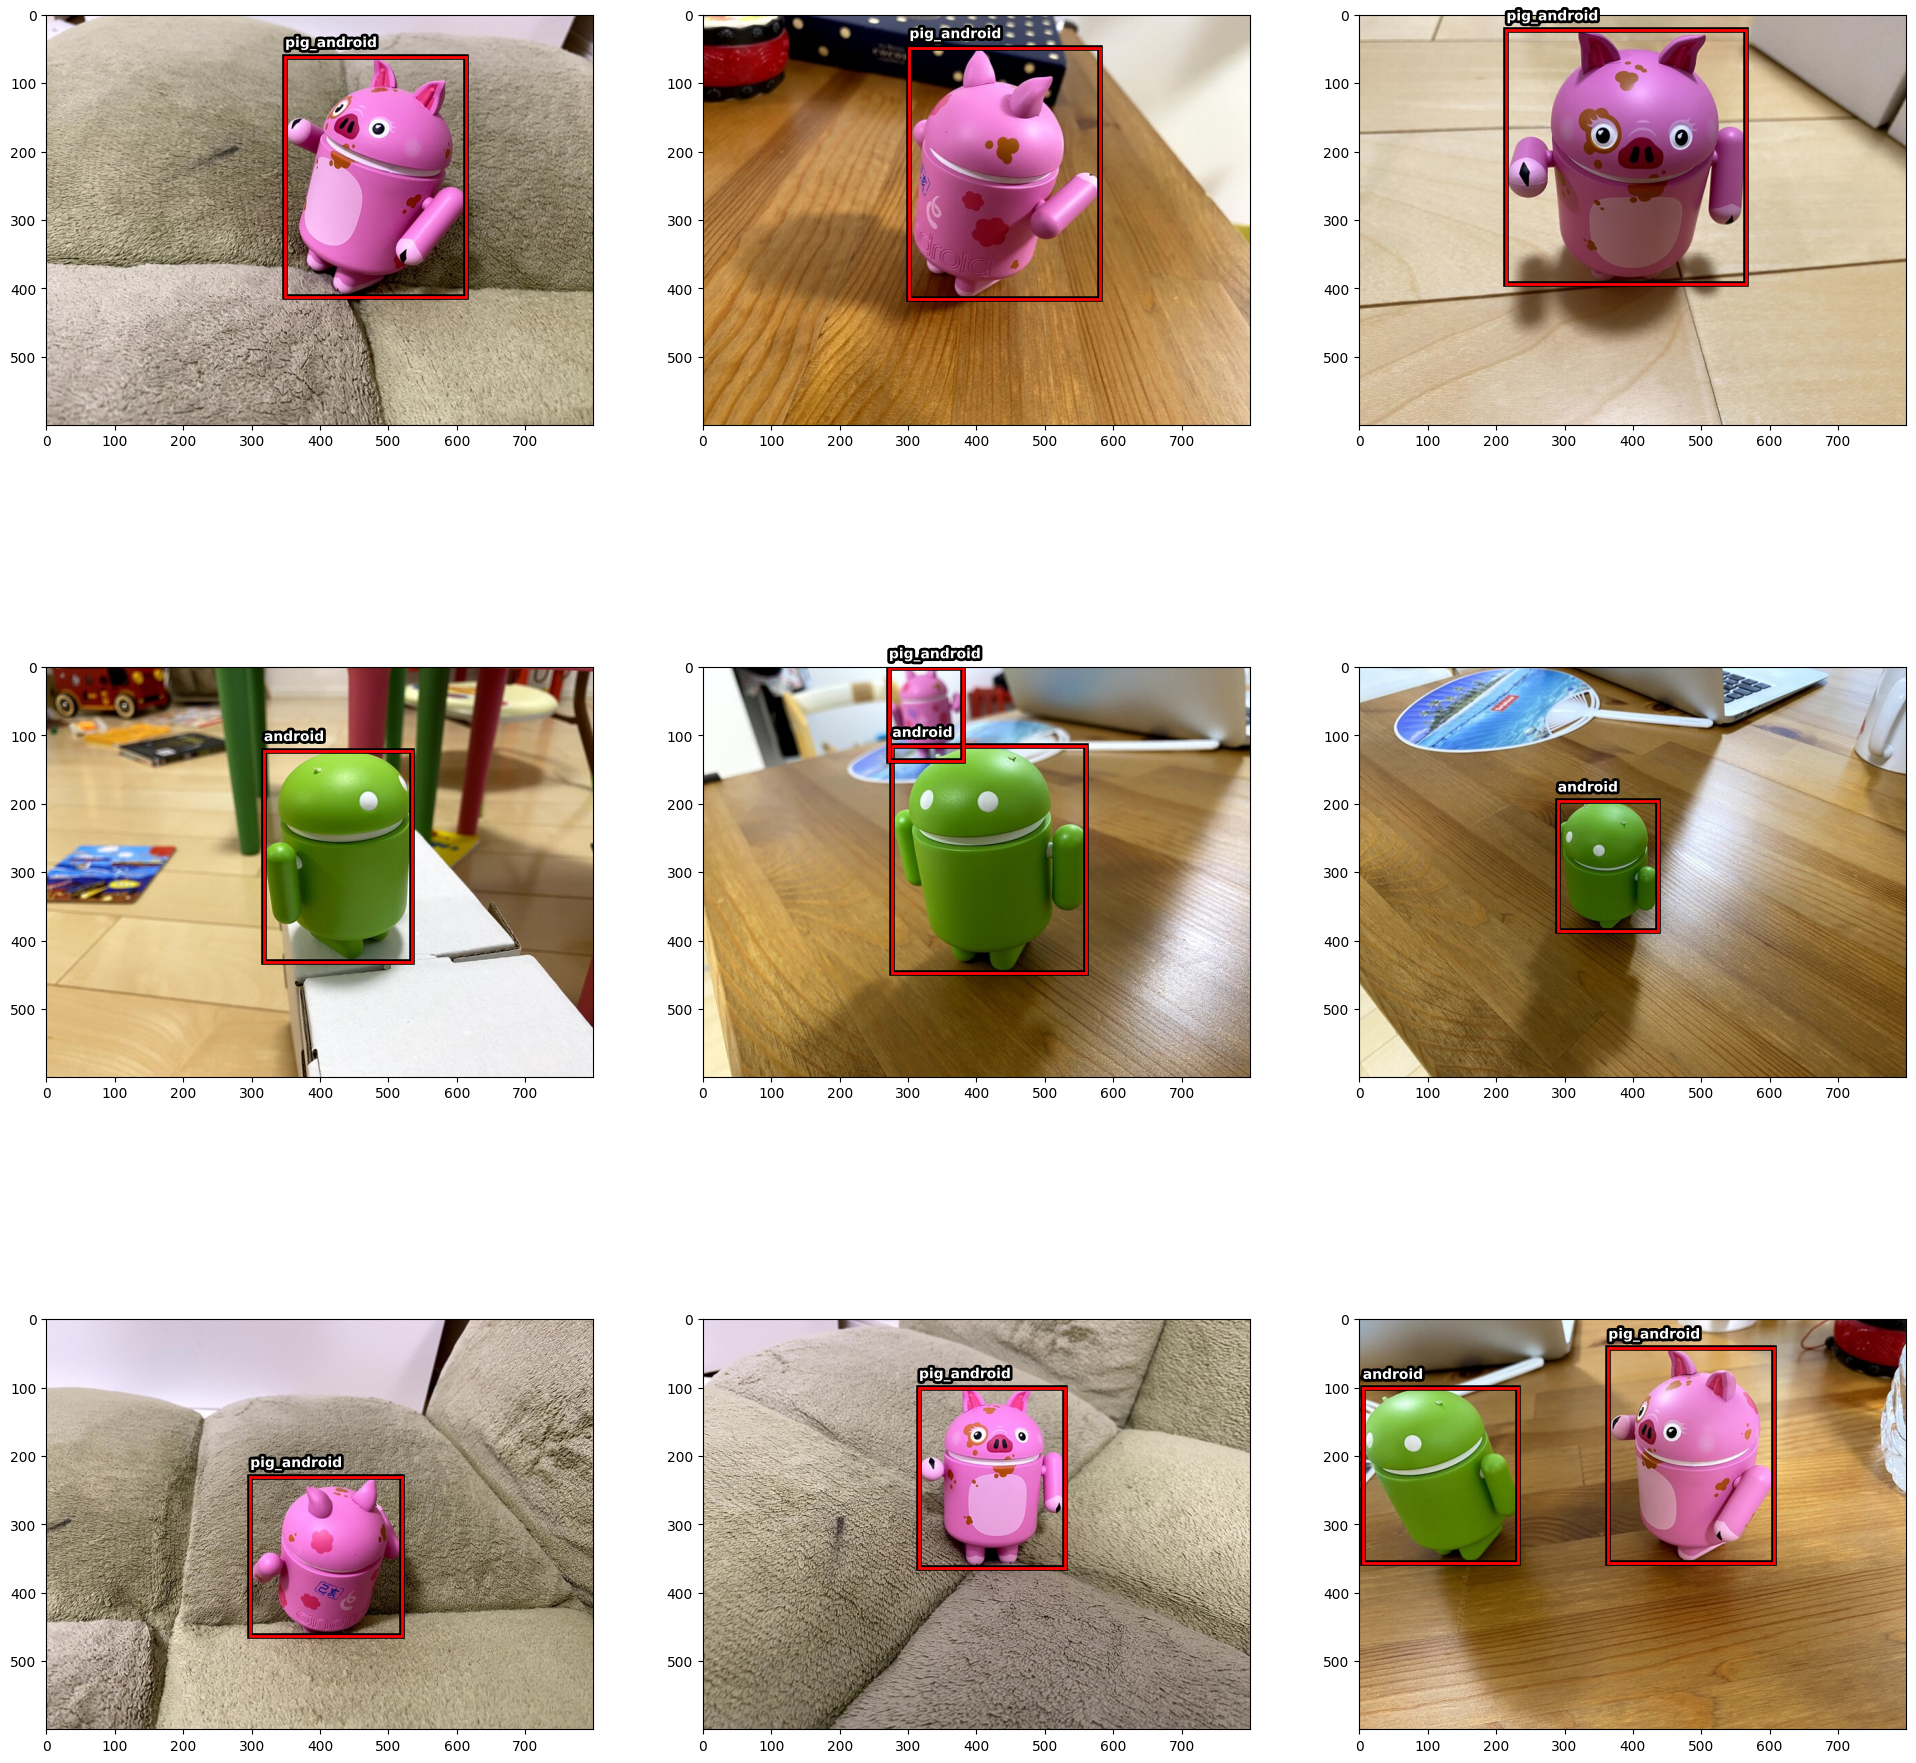

In [5]:
import math
from collections import defaultdict

import matplotlib.pyplot as plt
from matplotlib import patches, patheffects


def draw_outline(obj):
    obj.set_path_effects([patheffects.Stroke(linewidth=4, foreground="black"), patheffects.Normal()])


def draw_box(ax, bb):
    patch = ax.add_patch(patches.Rectangle((bb[0], bb[1]), bb[2], bb[3], fill=False, edgecolor="red", lw=2))
    draw_outline(patch)


def draw_text(ax, bb, txt, disp):
    text = ax.text(bb[0], (bb[1] - disp), txt, verticalalignment="top", color="white", fontsize=10, weight="bold")
    draw_outline(text)


def draw_bbox(ax, annotations_list, id_to_label, image_shape):
    for annotation in annotations_list:
        cat_id = annotation["category_id"]
        bbox = annotation["bbox"]
        draw_box(ax, bbox)
        draw_text(ax, bbox, id_to_label[cat_id], image_shape[0] * 0.05)


def visualize(dataset_folder, max_examples=None):
    with open(os.path.join(dataset_folder, "labels.json"), "r") as f:
        labels_json = json.load(f)

    images = labels_json["images"]
    cat_id_to_label = {item["id"]: item["name"] for item in labels_json["categories"]}
    image_annots = defaultdict(list)

    for annotation_obj in labels_json["annotations"]:
        image_id = annotation_obj["image_id"]
        image_annots[image_id].append(annotation_obj)

    if max_examples is None:
        max_examples = len(image_annots.items())
    n_rows = math.ceil(max_examples / 3)
    _, axs = plt.subplots(n_rows, 3, figsize=(24, n_rows * 8))  # 3 columns(2nd index), 8x8 for each image
    for ind, (image_id, annotations_list) in enumerate(list(image_annots.items())[:max_examples]):
        ax = axs[ind // 3, ind % 3]
        img = plt.imread(os.path.join(dataset_folder, "images", images[image_id]["file_name"]))
        ax.imshow(img)
        draw_bbox(ax, annotations_list, cat_id_to_label, img.shape)
    plt.show()


visualize(train_dataset_path, 9)